# LINER REGRESSION

## Lung Cap Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

C:\Users\SHREYASH\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\SHREYASH\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:61: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
pd.read_csv(r'LungCapData.csv')

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no
...,...,...,...,...,...,...
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no


In [3]:
lung=pd.read_csv(r'LungCapData.csv')

In [4]:
lung.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,no,male,no
1,10.125,18,74.7,yes,female,no
2,9.550,16,69.7,no,female,yes
3,11.125,14,71.0,no,male,no
4,4.800,5,56.9,no,male,no


In [5]:
lung.tail()

,LungCap,Age,Height,Smoke,Gender,Caesarean
720,5.725,9,56.0,no,female,no
721,9.050,18,72.0,yes,male,yes
722,3.850,11,60.5,yes,female,no
723,9.825,15,64.9,no,female,no
724,7.100,10,67.7,no,male,no


In [6]:
lung.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LungCap    725 non-null    float64
 1   Age        725 non-null    int64  
 2   Height     725 non-null    float64
 3   Smoke      725 non-null    object 
 4   Gender     725 non-null    object 
 5   Caesarean  725 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 34.1+ KB


In [7]:
lung.isnull().sum()[lung.isnull().sum()>0]

Series([], dtype: int64)

In [8]:
lung.Smoke.replace({'no':0,'yes':1},inplace=True)
lung.Gender.replace({'male':1,'female':0},inplace=True)
lung.Caesarean.replace({'no':0,'yes':1},inplace=True)

In [9]:
lung.head()

,LungCap,Age,Height,Smoke,Gender,Caesarean
0,6.475,6,62.1,0,1,0
1,10.125,18,74.7,1,0,0
2,9.550,16,69.7,0,0,1
3,11.125,14,71.0,0,1,0
4,4.800,5,56.9,0,1,0


In [10]:
from sklearn.model_selection import train_test_split
lung_train,lung_test=train_test_split(lung,test_size=.2)

In [11]:
lung_train_x=lung_train.iloc[::,1:]
lung_train_y=lung_train.iloc[::,0]

In [12]:
lung_test_x=lung_test.iloc[::,1:]
lung_test_y=lung_test.iloc[::,0]

In [13]:
lung_test_x

,Age,Height,Smoke,Gender,Caesarean
269,9,59.2,0,0,0
438,16,68.9,0,1,0
634,5,52.8,0,0,0
195,17,73.3,0,1,1
710,17,73.5,0,1,0
...,...,...,...,...,...
27,9,65.6,0,1,0
5,11,58.7,0,0,0
214,8,59.9,0,1,0
451,9,57.1,0,1,1


In [14]:
lung_test_y

269     8.775
438    10.500
634     2.025
195    12.125
710    12.325
        ...  
27      9.025
5       6.225
214     7.250
451     4.425
85      6.125
Name: LungCap, Length: 145, dtype: float64

In [15]:
from sklearn.linear_model import LinearRegression
linreg=LinearRegression()

In [16]:
linreg.fit(lung_train_x,lung_train_y)

LinearRegression()

In [17]:
linreg.score(lung_train_x,lung_train_y)

0.8547502507582094

In [18]:
lung_train_x.shape[0]

580

In [19]:
lung_train_x.shape[1]

5

In [20]:
Rsquare=linreg.score(lung_train_x,lung_train_y)
n=lung_train_x.shape[0]
k=lung_train_x.shape[1]

adjrsquare=1-(1-Rsquare)*(n-1)/(n-k-1)
adjrsquare

0.8534850090400754

In [21]:
linreg.intercept_

-10.839185046174045

In [22]:
linreg.coef_

array([ 0.17631663,  0.25278053, -0.65274665,  0.42995082, -0.11729756])

In [23]:
pred_train=linreg.predict(lung_train_x)
pred_test=linreg.predict(lung_test_x)

In [24]:
err_train=lung_train_y-pred_train

In [25]:
err_train

394   -0.185983
273    0.404939
402   -0.730402
94     0.292332
139    0.554710
         ...   
328   -1.566312
196    0.999288
338   -0.897587
649   -1.053865
577    0.842682
Name: LungCap, Length: 580, dtype: float64

In [26]:
err_train.mean()

1.6048465238719505e-15

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

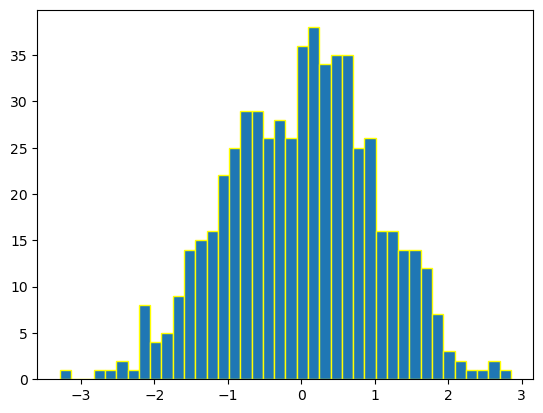

In [28]:
plt.hist(err_train,edgecolor='yellow',bins=40);

In [29]:
err_train.skew()

-0.08523998905425972

In [30]:
err_train.kurtosis()+3

2.768786195708047

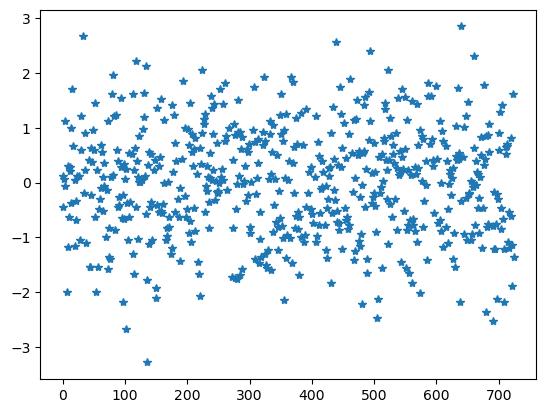

In [31]:
plt.plot(err_train,'*')

In [32]:
pred_act=pd.DataFrame()
pred_act['Actual']=lung_train_y
pred_act['Pred']=pred_train

<AxesSubplot:xlabel='Actual', ylabel='Pred'>

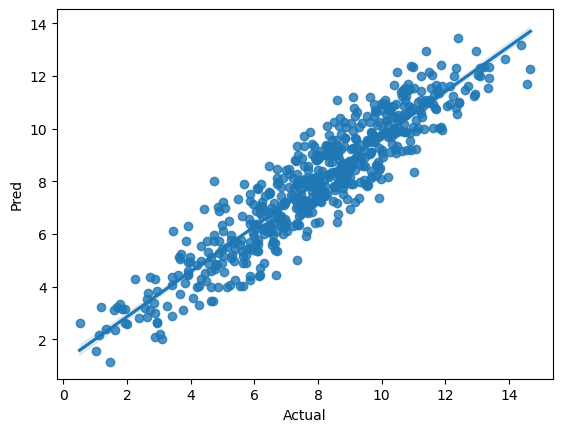

In [33]:
sns.regplot(x='Actual',y='Pred',data=pred_act)

In [34]:
err_test=lung_test_y-pred_test
err_test

269    3.062728
438    0.671589
634   -1.364210
195    1.125336
710    1.157482
         ...   
27     1.264982
5      0.286485
214    1.107147
451   -1.069086
85    -1.035325
Name: LungCap, Length: 145, dtype: float64

In [35]:
import numpy as np

In [36]:
mse=np.mean(np.square(err_test))
mse

1.154855667155146

In [37]:
np.sqrt(mse)

1.0746421111956976

In [38]:
mape=np.mean(np.abs(err_test*100/lung_test_y))

In [39]:
mape

13.870044171842123

In [40]:
acc=100-mape
acc

86.12995582815788